# Lightcurve (+ Transit) Creation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import lightcurveenhanced as lce
plt.rcParams["lines.markersize"] = 3

In [9]:
transits = lce.LightCurveTheoretical(ticksinper = 100, depth = .05, duration = .3, numper = 2)

23 53 38
False
123 153 138
False


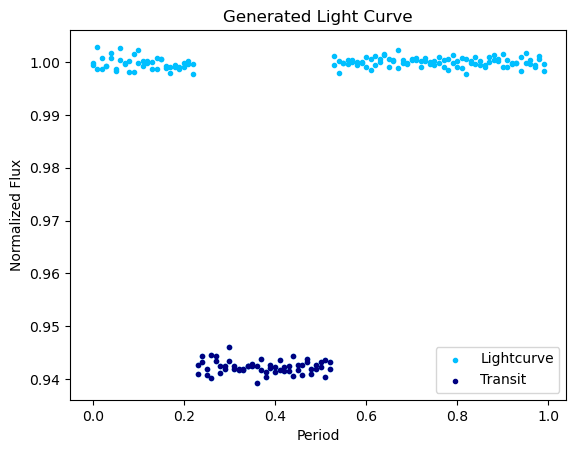

In [10]:
while transits.per < transits.numper:
    transits.plot_transit(phase_flag=True)
    transits.new_transit()


In [4]:
import astropy.units as u

In [5]:
class Exoplanet(object):

    def __init__(self, rad, a, rad_unit = "R_J", a_unit = "AU"):
        
        if rad_unit == "R_J":
            self.radius = rad * u.R_jup
        elif rad_unit == "R_earth":
            self.radius = rad * u.R_earth
        elif rad_unit == "m":
            self. radius == rad * u.m
        else: 
            raise("ValueError: rad_unit must be 'R_J', 'R_earth', or 'm'.")
        if a_unit == "AU":
            self.a = a * u.au
        elif a_unit == "m":
            self.a = a * u.m
        else:
            raise("ValueError: a_unit must be either 'AU' or 'm'.")
        #self.mass = mass * u.M_jup

class Star(object):
    
    def __init__(self, rad, rad_unit = "R_Sun"):
        self.radius = rad * u.R_sun
#        self.mass = mass * u.M_sun



In [26]:
testplanet = Exoplanet(5, .047)


In [27]:
teststar = Star(1.2)

In [28]:
a = float(((testplanet.radius / teststar.radius).to(''))**2)

In [29]:
a

0.18333627503213448

In [30]:
sunjup = lce.LightCurveExoplanet(testplanet, teststar, ticksinper=1000, numper = 3)

411 420 416
False
911 920 916
False
274 283 279
False
774 783 779
False
345 354 350
False
845 854 850
False
494 503 499
False
3 994 999
True
302 311 307
False
802 811 807
False


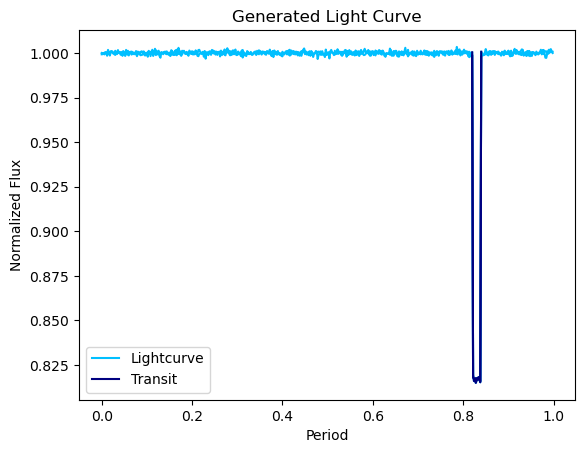

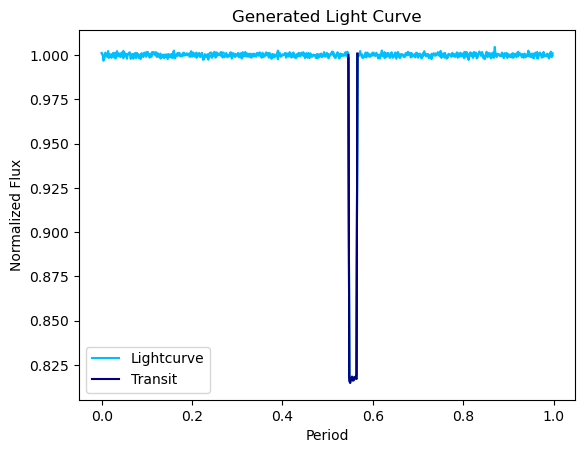

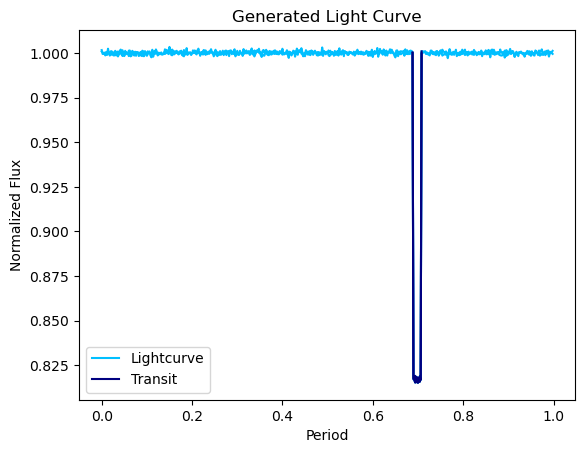

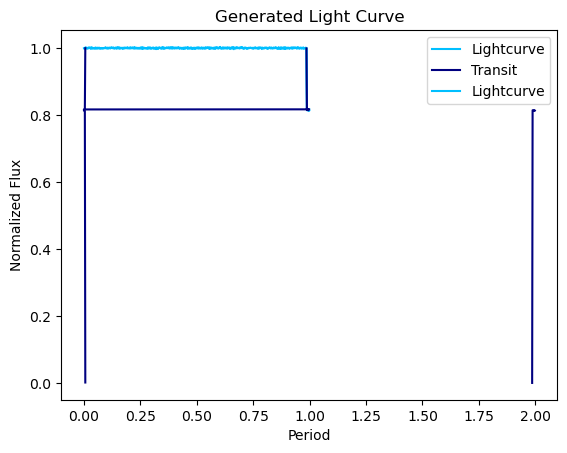

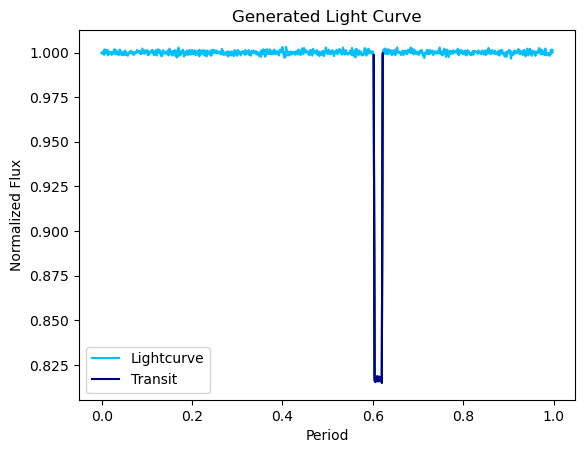

In [32]:
for i in np.arange(0,5):
        sunjup = lce.LightCurveExoplanet(testplanet, teststar, ticksinper=500, numper = 2)
        plt.figure()
        while sunjup.per < sunjup.numper:
                sunjup.plot_transit(phase_flag=True)
                sunjup.new_transit()

In [33]:
x = np.linspace(0,1,100)
y= np.ones(100)
y[40:60] = .85
for i in np.arange(35,40):
    y[i] = 1 - ((i-35)/4)*(1-.85)
for i in np.arange(60,65):
    y[i] = 1 + ((i-64)/4)*(1-.85)  

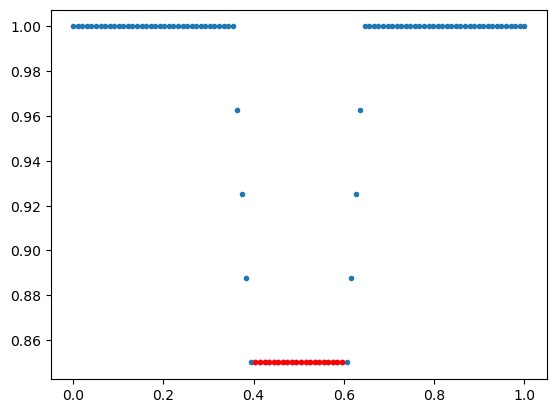

In [34]:
plt.scatter(x,y)
plt.scatter(x[40:60],y[40:60],color = 'r')

In [189]:
class LightCurveTheoretical(object):
     
    """
        Light Curve with transit details for one period, for theoretical transit details

        Args:
            ticksinper (integer): Number of timesteps in a single period
            depth (float): Depth of transit to be simulated
            duration (float): fraction of one period for planet to be in transit
            noise (float): noise to be added to the flux
            numper (int): Number of periods to be simulated
        

        Attributes:
            ticksinper (integer): Number of timesteps in one period
            length (integer): Number of total timesteps
            depth (float): Depth of simulated transit
            duration (float): Time length of simulated transit
            noise (float): Normalized noise to be added to flux
            location (float): Central location of transit
            flux (array): Normalized flux of light curve
            numper (int): The number of periods to be simulated
            per (int): current number of period being simulated
            lb (int): Found lower bound for transit 
            ub (int): Found upper bound for transit
            overflow_flag (Bool): Whether or not transit goes over either end of lightcurve. if it does, loop to the other side.
    """

    def __init__(self, ticksinper = 100, depth = 0, duration = 0, noise = .001, numper = 1):

        self.ticksinper = ticksinper
        self.length = self.ticksinper * numper
        if depth == 0:
            self.depth = np.random.uniform(.01,.20)
        else:
            self.depth = np.random.normal(loc = depth, scale = .01, size = 1)[0]
        if duration == 0:
            self.duration = np.random.randint(.02 * ticksinper, .15 * ticksinper)
        else:
            self.duration = duration * ticksinper
        self.noise = noise
        self.location = np.random.randint(0,ticksinper)
        self.flux = np.ones(self.length) + np.random.normal(loc = 0, scale = self.noise, size = self.length)
        self.per = 0
        self.numper = numper
        self.slopelength = int(self.duration/10)
        
    def plot_transit(self, phase_flag = False):
        """ 
        Subtracts transit from the flux and plots the resulting lightcurve
        
        Args:
            phase_flag (Bool, default = False): Decides if graph plotted is phasefolded or not

        """
        while self.per < self.numper:

            lowerbound = int(self.ticksinper/2 * (1 + 2 *self.per) - self.duration/2)
            upperbound = int(self.ticksinper/2 * (1 + 2 *self.per) + self.duration/2)

            self.ub = int(upperbound)
            self.lb = int(lowerbound) 

            self.flux[self.lb:self.ub] -= self.depth

            for i in np.arange(self.lb - self.slopelength, self.lb):
                self.flux[i] = 1 - (i - (self.lb - self.slopelength))/(self.slopelength) * (self.depth)
            for i in np.arange(self.ub, self.slopelength + self.ub):
                self.flux[i] = 1 + (i - (self.ub + self.slopelength))/(self.slopelength) * (self.depth)

            self.per += 1
            self.depth = np.random.normal(loc=self.depth, scale = 0.001, size = 1)[0]
        
        self.flux = np.roll(self.flux,self.location)
        self.plot(phase_flag)

    def plot(self, phase_flag = False):
        """
        Plots the light curve including the transit, then updates the period counter

        Args:
            phase_flag (Bool, default = False): Decides if plot is phasefolded or not.

        """
        if phase_flag == True:
            plt.scatter(np.arange(self.ticksinper*self.per)/self.ticksinper % 1, self.flux, color = 'deepskyblue', label = "Light Curve")
            transit_idxs = np.where(transits.flux<.99)[0]
            plt.scatter(transit_idxs/self.ticksinper % 1, self.flux[transit_idxs], color = 'navy', label = "Transit")
            plt.xlabel("Phase")
        else:
            plt.scatter(np.arange(self.ticksinper*self.per)/self.ticksinper, self.flux, color = 'deepskyblue', label = "Light Curve")
            transit_idxs = np.where(transits.flux<.99)[0]
            plt.scatter(transit_idxs/self.ticksinper, self.flux[transit_idxs], color = 'navy', label = "Transit")
            plt.xlabel("Period")
        plt.ylabel("Normalized Flux")
        plt.title("Generated Light Curve")
        plt.legend()
        self.per += 1

In [190]:
transits = LightCurveTheoretical(ticksinper = 100, depth = .1, duration = .3, numper = 2)
transits.slopelength


3

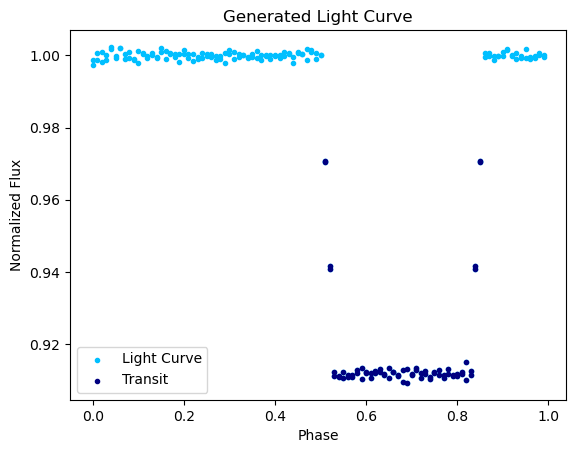

In [191]:
transits.plot_transit(phase_flag=True)